# Part 2-2: CFL condition 
*E.Sirati, A.Rezaei*

---
In order to sample a continuous medium to a discrete one (using Finite difference), there are some rules we need to obey. These rules specify the **dt** which is the samling interval of the time, and **dx, dz** which are the intervals of coordinates. These rules are called **CFL** condition. This condition is named after *Richard Courant, Kurt Friedrichs, and Hans Lewy* who introduced it in their 1928 paper (Wikipedia). In our work, CFL condition is defined as:

$\begin{array}{l}
dx = dz = \frac{{\min (V)}}{{5*{f_{\max }}}},\begin{array}{*{20}{c}}
{}&{}
\end{array}{\rm{ }}{f_{\max }} = 2.5{f_0}\\
dt = 0.1\frac{{\min (V)}}{{\max (V)*{f_{\max }}}}
\end{array}$

These conditions give us the maximum possible values to have stable numerical modeling. We could use lower amounts but it is not computationally efficient (it's better that you do not change them). So the sequence of our code should be like:

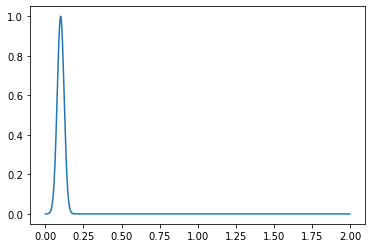

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
# ------------------------------------------------------------------------------------------------------------
# Step 1 : Creating Velocity model and specifying discrete parameters (dx , dz)
# ------------------------------------------------------------------------------------------------------------
nx = 100
nz = 100
layer1 = np.ones( (int(nz/3),nx) )*1000           
layer2 = np.ones( (int(nz/3),nx) )*2000           
layer3 = np.ones( (nz - 2*int(nz/3),nx) )*3000
layer1and2 = np.append(layer1, layer2 , axis=0)  
V = np.append(layer1and2, layer3 , axis=0)            

f0 = 10          # Dominant frequency of source
fmax=2.5*f0      # Fmax
dt = 0.1*np.min(V)/(np.max(V)*fmax)  # obtains dt using CFL condtion
dx = dz =np.min(V)/(5*fmax)          # obtains dx and dz using CFL condtion
X = np.arange(0 , nx*dx , dx)  
Z = np.arange(0 , nz*dz , dz)  

# ------------------------------------------------------------------------------------------------------------
# steps 2 : Creating an array as time: t
# ------------------------------------------------------------------------------------------------------------
tmin = 0  # unit: Second
tmax = 2  # unit: Second
t = np.arange(tmin,tmax,dt)   # arange function inputs: (start point, end point, interval)

# ------------------------------------------------------------------------------------------------------------
# steps 3 : Choosing arbitrarily value
# ------------------------------------------------------------------------------------------------------------
a = 1     # Amplitude
t0 = 0.1  # Time shift

# ------------------------------------------------------------------------------------------------------------
# Step 4 : Creating Gaussian
# ------------------------------------------------------------------------------------------------------------
G = a*np.exp(-m.pi**2*f0**2*(t-t0)**2)
plt.plot(t,G)

- - - 
## Fourier Transform

If you want to calculate wave propagation in the frequency domain, you need to transfer the source wavelet to the frequency domain (Fourier transform). To do that, you can use Scipy function: ***fft()*** (so you need to add the scipy library).

**Attention:** You don't need to do this step for Time domain wave propagation but we will use it in the frequency domain later.

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'frequency domain of curve (real part)')

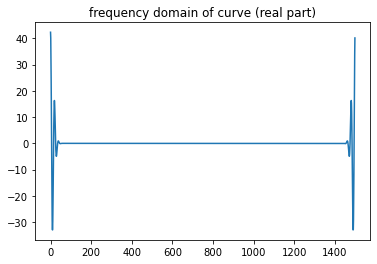

In [25]:
import scipy.fft as sc
FG = sc.fft(G)
plt.plot(FG)
plt.title('frequency domain of curve (real part)')

As we use "plot" to see the result of fft, we will come across the warning shown above. This happens because the result of fft is a complex value array and we **can not** plot a complex array, we can display the real part or the imaginary part of the array individually (usually we plot the real part). The *plot()* function just plots the real value by default. But let's do this correctly.
we can choose real part of an array using ***np.real()*** function of numpy.

Text(0.5, 1.0, 'frequency domain of curve (real part)')

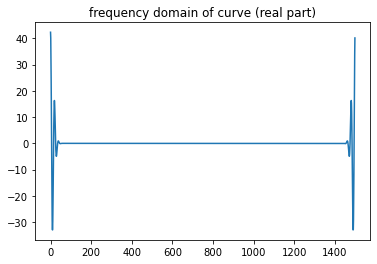

In [26]:
plt.plot(np.real(FG))
plt.title('frequency domain of curve (real part)')

Great. But we are not finished yet. From the left to right of the plot, first, we have the positive low frequencies, at the middle of the figure we have higher frequencies and as we pass the middle of the figure there are negative high frequencies, and the amount of negative frequencies decreases as we reach to the end of the figure. That's just how fft works. But that's confusing to display because the low frequencies are appearing in two disconnected locations at the beginning and the end of the figure. Figure below shows what we need to do.

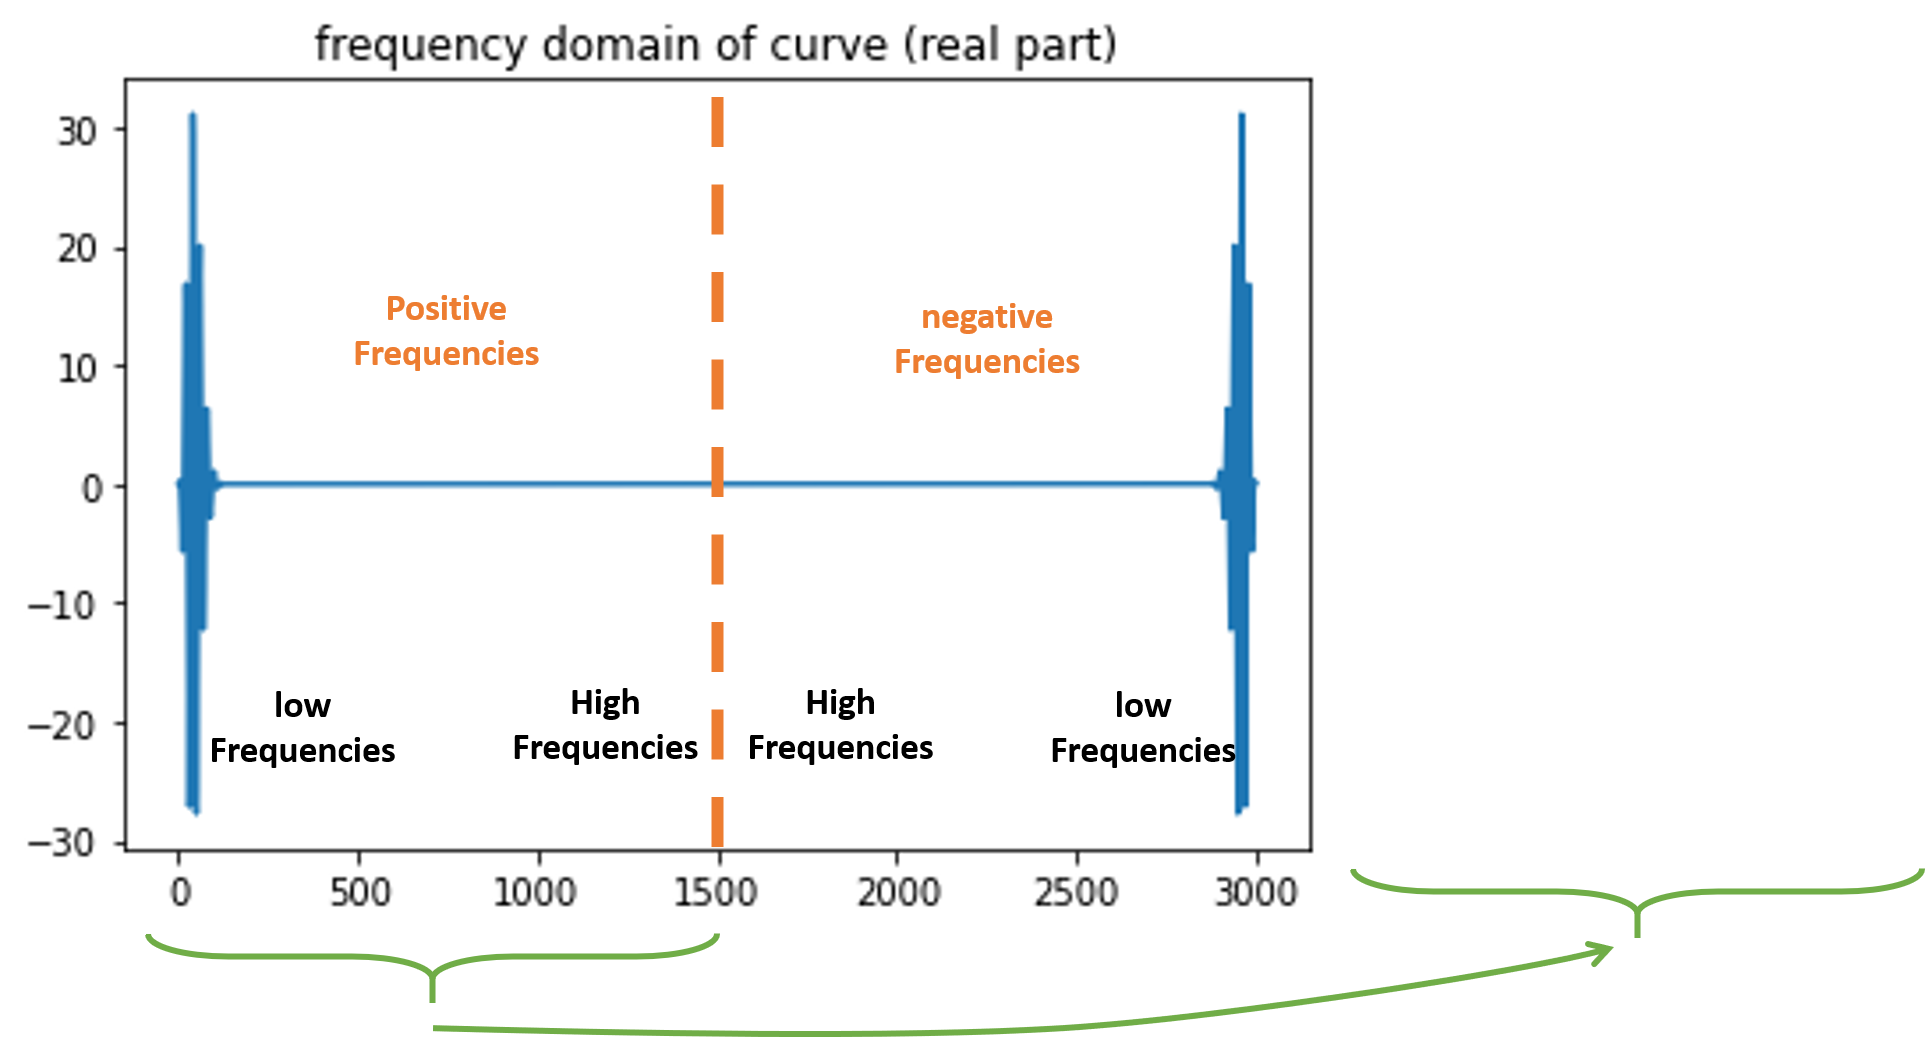

In [28]:
from PIL import Image    # This is how we can add picture to our jupyter notebook
Image.open("Freq.png")

We utilize ***fftshift()*** from scipy to move the location of zero frequency to the middle of the array (It shift positive values to the right of figure).

Text(0.5, 1.0, 'Shifted frequency domain of curve (real part)')

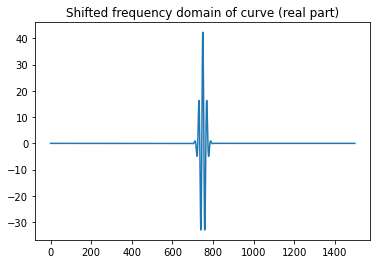

In [30]:
FGshift = sc.fftshift(FG)
plt.plot(np.real(FGshift))
plt.title('Shifted frequency domain of curve (real part)')

Ok, now it's correct. But still, we need to adjust the axes. The y-axis is the amplitude and contains the values of the array so we just add a label to it.\
But the x-axis represents frequencies and the zero of the x-axis should be in the middle of the plot. So we create an array (e.g. Xf) just to show the x-axis correctly.\
The size of the gaussiancurve in frequency domain is equal to the size of gaussian at time domain and both are equal to the size of the time array.
- We obtain the size of time array by *len()* function $(Nt = np.len(t))$.
- Then we split it in half like what the **fftshift** did to our curve $\large (-\frac{{{\rm{Nt}}}}{2}{\rm{:}}\frac{{{\rm{Nt}}}}{2})$
     (remembr if Nt is even use ($\large (-\frac{{{\rm{Nt-1}}}}{2}{\rm{:}}\frac{{{\rm{Nt-1}}}}{2})$)
- Determine the value of **df** (frequency interval) ($\large df = \frac{1}{{Nt \times dt}}$)
- Then faxis obtain by $(\large faxis = {{\left[ { - \frac{{Nt}}{2}:\frac{{Nt}}{2}} \right]}}\times{{df}})$.

Then we use *faxis* array to fix x-axis.\
If you can not figure out what is going on just memorize these steps or codes, it's not a big deal.

Text(0.5, 0, 'Frequency')

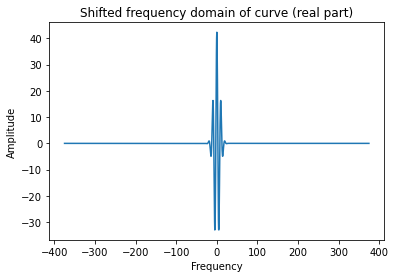

In [31]:
Nt = len(t)
df = 1/(dt*Nt)
faxis = np.arange(-Nt/2,Nt/2)*df     # just save this peice of code somewhere and use it to create faxis
plt.plot(faxis,np.real(FGshift))     # fixing x-axis
plt.title('Shifted frequency domain of curve (real part)')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')

At last, we finished plotting the frequency component of the gaussian curve.\
You may want to zoom the plot. We can limit the axes of the plot. Using ***xlim()*** function.

(-30.0, 30.0)

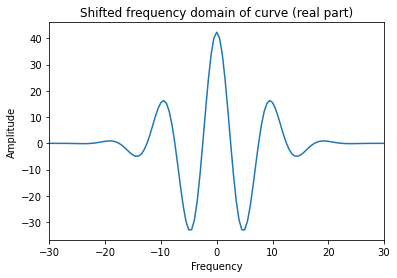

In [32]:
plt.plot(faxis,np.real(FGshift))    # fixing x-axis
plt.title('Shifted frequency domain of curve (real part)')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')

plt.xlim( (-30,30) )   # limit x-axis, the inputs are the left and right values of x that we want to see

Now the whole code:

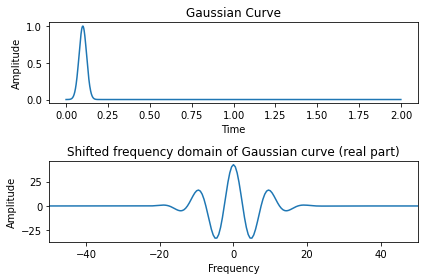

In [37]:
# Importing libraries
import matplotlib.pyplot as plt
import scipy.fft as sc
import numpy as np
import math as m

# ------------------------------------------------------------------------------------------------------------
# Step 1 : Creating Velocity model and specifing discrete parameters (dx , dz)
# ------------------------------------------------------------------------------------------------------------
nx = 100
nz = 100
layer1 = np.ones( (int(nz/3),nx) )*1000    
layer2 = np.ones( (int(nz/3),nx) )*2000    
layer3 = np.ones( (nz - 2*int(nz/3),nx) )*3000    
layer1and2 = np.append(layer1, layer2 , axis=0)   
V = np.append(layer1and2, layer3 , axis=0)            

f0 = 10;            
fmax = 2.5*f0;      
dt = 0.1*np.min(V)/(np.max(V)*fmax) 
dx = dz = np.min(V)/(5*fmax)         
X = np.arange(0 , nx*dx , dx)  
Z = np.arange(0 , nz*dz , dz)  

# ------------------------------------------------------------------------------------------------------------
# steps 2 : Creating an array as time: t
# ------------------------------------------------------------------------------------------------------------
dt = 0.1*np.min(V)/(np.max(V)*fmax)
tmin = 0  
tmax = 2  
t = np.arange(tmin,tmax,dt)   

# ------------------------------------------------------------------------------------------------------------
# steps 3 : Choosing arbitrarily value
# ------------------------------------------------------------------------------------------------------------
a = 1     
t0 = 0.1  

# ------------------------------------------------------------------------------------------------------------
# Step 4 : Creating Gaussian
# ------------------------------------------------------------------------------------------------------------
G = a*np.exp(-m.pi**2*f0**2*(t-t0)**2)

# ------------------------------------------------------------------------------------------------------------
# Step 5 : Fourier Transform of the gaussian
# ------------------------------------------------------------------------------------------------------------
FG = sc.fft(G)
FGshift = sc.fftshift(FG)
Nt = len(t)
faxis = np.arange(-Nt/2,Nt/2)/(dt*Nt)  # just save this line somewhere and use it to create faxis


# ------------------------------------------------------------------------------------------------------------
# Step 6 : Plot gaussian and Fourier Transform of the it
# ------------------------------------------------------------------------------------------------------------
plt.subplot(2,1,1)
plt.plot(t,G)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Gaussian Curve')

plt.subplot(2,1,2)
plt.plot(faxis,np.real(FGshift))   
plt.title('Shifted frequency domain of Gaussian curve (real part)')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.xlim( (-50,50) )


plt.tight_layout()

- - -

### Follow us
**Researchgate**:

https://www.researchgate.net/profile/Elahe-Sirati 

https://www.researchgate.net/profile/Arash-Rezaei-5 

**Github**:

https://github.com/ElaheSirati 

https://github.com/ArashRezaei 

### Contact us 

elaheh.sirati@yahoo.com 

arashrezaei@ut.ac.ir